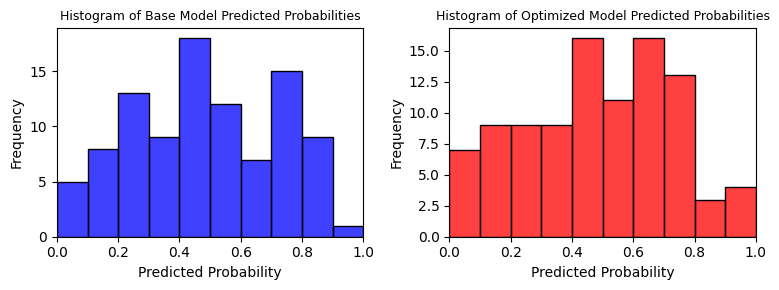

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import joblib
import sys

# Read in dataframe
df = pd.read_csv("central_ok_mds_env_FINAL.csv")

# Unit test to determine if csv read in correctly and no values are missing
if df.isnull().sum().all() == 0:
    pass
else:
    sys.exit('❌ Error. One or more values are missing. Please check csv file to remove any dates with incomplete environmental values.')
    
# Split data
train_data, val_test_data = train_test_split(df, test_size = 0.3, random_state = 988)
val_data, test_data = train_test_split(val_test_data, test_size = 0.6667, random_state = 988)

# Set feature list
feature_list = ['month', 'time', 'pwat', 'mslp', 'cape', 'cin', 't2m', 'rh2m', 'q2m', 'u10', 'v10', 'uv10', 'lcl', 'shr0_6', 'srh0_1', 'srh0_3']

# Read in base Random Forest model
rf_base = joblib.load("random_forest_base.joblib")
rf_base.fit(train_data[feature_list].values, train_data.label.values)

# Read in optimized Random Forest model
rf_opt = joblib.load("random_forest_opt.joblib")
rf_opt.fit(train_data[feature_list].values, train_data.label.values)

# Find prediction probabilities
rf_base_pred_prob = rf_base.predict_proba(val_data[feature_list].values)[:, 1]
rf_opt_pred_prob = rf_opt.predict_proba(val_data[feature_list].values)[:, 1]

# Set basemape
plt.rcParams['figure.figsize'] = 8, 3

# Plot base model prediction probability histogram
ax = plt.subplot(1, 2, 1)
bins = np.arange(0, 1 + 0.1, 0.1)
sns.histplot(x = rf_base_pred_prob, bins = bins, color = 'blue') 
ax.set_xlim(0, 1) 
ax.set_title('Histogram of Base Model Predicted Probabilities', fontsize = 9) 
ax.set_xlabel('Predicted Probability') 
ax.set_ylabel('Frequency') 

# Plot optimized model prediction probability histogram
ax = plt.subplot(1, 2, 2)
bins = np.arange(0, 1 + 0.1, 0.1)
sns.histplot(x = rf_opt_pred_prob, bins = bins, color = 'red') 
ax.set_xlim(0, 1) 
ax.set_title('Histogram of Optimized Model Predicted Probabilities', fontsize = 9) 
ax.set_xlabel('Predicted Probability') 
ax.set_ylabel('Frequency') 

plt.tight_layout()
plt.savefig('figure_12.jpg')